In [1]:
import os
import pandas as pd
import numpy as np
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, mean_squared_error

data_dir = '/content/content/MyDrive/data/titanic'

drive.mount('content')
os.chdir(data_dir)
os.listdir()

Mounted at content


['train.csv',
 'gender_submission.csv',
 'test.csv',
 'titanic.zip',
 'test_1hot.csv',
 'train_1hot.csv']

# __Introduction to Support vector machine__
- **Versatility**: SVM solves classification and regression tasks, making it a robust, adaptable algorithm.  
- **Hyperplane**: It finds the optimal boundary to separate data points into distinct categories effectively.  
- **Support Vectors**: Critical data points define the hyperplane and influence its exact positioning.  
- **Kernels**: Uses functions like polynomial or RBF to handle non-linear separations in data.  
- **High-Dimensional Data**: Excels at identifying margins in complex, multi-feature datasets with precision.  
- **Applications**: Widely used in image recognition, text categorization, fraud detection, and more.  

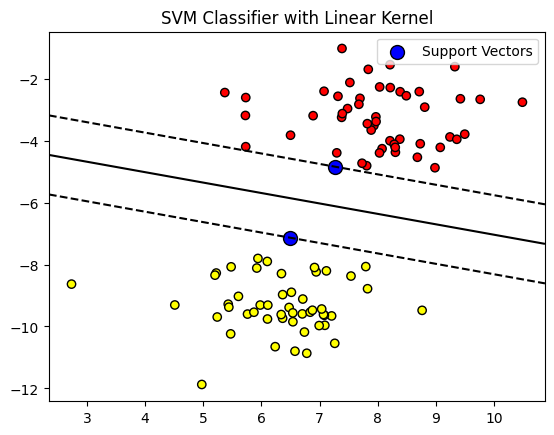

In [2]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

# Generate synthetic data for two classes
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train the SVM classifier
model = SVC(kernel='linear')  # Using a linear kernel
model.fit(X, y)

# Plot the data points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')

# Plot the decision boundary (hyperplane)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create a grid for plotting the decision boundary
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Plot the decision boundary and margin
ax.contour(XX, YY, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')

# Highlight support vectors
ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100,
           facecolors='blue', edgecolors='k', label="Support Vectors")

plt.title("SVM Classifier with Linear Kernel")
plt.legend()
plt.show()

# __Key terms for SVM__
- **Hyperplane**: The dividing boundary that separates data points into distinct categories.  
- **Margin**: The buffer zone around the hyperplane for clear class separation and robustness.  
- **Support Vectors**: Key data points that define the hyperplane and influence its positioning.  
- **Kernel Functions**: Tools to handle non-linear data by transforming it into higher dimensions.  
- **C Parameter**: Balances model flexibility and accuracy by controlling the decision boundary's rigidity.  
- **Gamma**: Determines how much influence each data point has on the decision boundary.  
- **Applications**: Widely used for tasks like spam detection, image classification, and pattern recognition.

# __Support vector classification (SVC)__
- **Demonstration with Titanic Dataset**: SVM was applied to classify Titanic survivors using Scikit-learn's SVC module.  
- **Linear Kernel Performance**: Training with a linear kernel yielded approximately 78% accuracy, showcasing its simplicity.  
- **Kernel Exploration**: Polynomial and RBF kernels outperformed others, achieving 83% training and 80% validation accuracy.  
- **Comparison to Other Models**: SVM outshined Logistic Regression and KNN, improving accuracy from 80.5% to 83%.  

In [3]:
df_train_1hot = pd.read_csv('train_1hot.csv')

In [4]:
# Import libraries
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Assume your Titanic DataFrame is already loaded as 'df_train_1hot'

# Separate features (X) and target variable (y)
X = df_train_1hot.drop(columns=['Survived'])
y = df_train_1hot['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the SVC model
model = SVC(kernel='linear')  # Using a linear kernel for simplicity
model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = model.predict(X_train)

# Predict on the test set
y_test_pred = model.predict(X_test)

# Evaluate the model
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Accuracy of SVC on the training data: {train_accuracy:.2f}%")
print(f"Accuracy of SVC on the test data: {test_accuracy:.2f}%")

Accuracy of SVC on the training data: 78.79%
Accuracy of SVC on the test data: 78.21%


In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Try with different kernels
for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    print(f"Using kernel: {kernel}")

    # Initialize the SVC model with the current kernel
    model = SVC(kernel=kernel, random_state=42)

    # Train the model
    model.fit(X_train, y_train)

    # Predict on the training set
    y_train_pred = model.predict(X_train)

    # Predict on the test set
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    train_accuracy = accuracy_score(y_train, y_train_pred) * 100
    test_accuracy = accuracy_score(y_test, y_test_pred) * 100

    print(f"Accuracy on training data with {kernel} kernel: {train_accuracy:.2f}%")
    print(f"Accuracy on test data with {kernel} kernel: {test_accuracy:.2f}%\n")


Using kernel: linear
Accuracy on training data with linear kernel: 78.79%
Accuracy on test data with linear kernel: 78.21%

Using kernel: poly
Accuracy on training data with poly kernel: 83.29%
Accuracy on test data with poly kernel: 80.45%

Using kernel: rbf
Accuracy on training data with rbf kernel: 83.29%
Accuracy on test data with rbf kernel: 80.45%

Using kernel: sigmoid
Accuracy on training data with sigmoid kernel: 67.13%
Accuracy on test data with sigmoid kernel: 62.01%



# __Randomized Search__
- **Randomized Search Introduction**: Efficiently explores parameter combinations by randomly sampling across predefined ranges.  
- **C and Gamma**: Key hyperparameters controlling model flexibility, precision, and influence of data points.  
- **Manual Tuning Challenges**: Adjusting hyperparameters like C and gamma manually is tedious and inefficient.  
- **Param_distributions Dictionary**: Defines parameter ranges guiding the exploration process during random search.  
- **RandomizedSearchCV Setup**: Utilizes SVC with 80 iterations, 5-fold cross-validation, and scoring based on accuracy.  
- **Reproducibility**: Setting `random_state=42` ensures consistency and reliable hyperparameter tuning results.  
- **Efficiency Gains**: Demonstrates tools for systematically improving model performance and generalization.

In [6]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Define the parameter grid for Randomized Search
param_distributions = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}

# Initialize the SVC model
svc = SVC(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=svc, param_distributions=param_distributions, n_iter=80, cv=5, random_state=42, scoring='accuracy')
random_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)
print(f"Best cross-validated accuracy from RandomizedSearchCV: {random_search.best_score_ * 100:.2f}%")

# Test the best model on the test set
best_model = random_search.best_estimator_

# Evaluate accuracy for both training and testing data
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100

y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100

print(f"Training accuracy with the best model: {train_accuracy:.2f}%")
print(f"Test accuracy with the best model: {test_accuracy:.2f}%")

Best parameters from RandomizedSearchCV: {'kernel': 'poly', 'gamma': 'scale', 'C': 0.1}
Best cross-validated accuracy from RandomizedSearchCV: 82.73%
Training accuracy with the best model: 83.01%
Test accuracy with the best model: 80.45%


# __Grid search__
- **Grid Search Overview**: A systematic method to test all possible parameter combinations exhaustively.  
- **Thorough Exploration**: Ensures every parameter combination is evaluated, leaving no options untested.  
- **Best for Small Spaces**: Ideal for small parameter ranges where precise optimization is essential.  
- **Model Refinement**: Helps improve performance and gain insights into hyperparameter effects.  
- **Comparison to Random Search**: Unlike randomized search, grid search offers a structured, comprehensive approach.

In [7]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Define the parameter grid for Grid Search
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]
}


# Perform Grid Search
svc = SVC(random_state=42)
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best parameters from GridSearchCV:", grid_search.best_params_)
print(f"Best cross-validated accuracy from GridSearchCV: {grid_search.best_score_ * 100:.2f}%")

# Test the best model on the training set
best_model = grid_search.best_estimator_

# Calculate training accuracy
y_train_pred = best_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred) * 100
print(f"Training accuracy with the best model: {train_accuracy:.2f}%")

# Test the best model on the test set
y_test_pred = best_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred) * 100
print(f"Test accuracy with the best model: {test_accuracy:.2f}%")

Best parameters from GridSearchCV: {'C': 10, 'gamma': 'auto', 'kernel': 'poly'}
Best cross-validated accuracy from GridSearchCV: 82.73%
Training accuracy with the best model: 83.01%
Test accuracy with the best model: 80.45%


# __Support vector regression (SVR)__
- **SVR with Kernels**: Demonstrated regression using Linear, Polynomial, and RBF kernels for comparison.  
- **Linear Kernel Suitability**: Achieved the best balance of accuracy and simplicity for this dataset.  
- **Randomized and Grid Search**: Employed both techniques for systematic hyperparameter tuning and optimization.  
- **SVM Overview**: Expanded our machine learning toolkit with SVM’s versatile classification and regression abilities.  
- **Enhanced Adaptability**: Improved our ability to choose and apply models based on specific requirements.

In [8]:
os.chdir('..')
os.listdir()


['train.csv',
 'feature_details_analysis.xlsx',
 'data_description.txt',
 'feature_classification.csv',
 'train_refined - Copy.csv',
 'feature_classification - Copy.csv',
 'train_refined.csv',
 'train_refined - Copy (2).csv',
 'train_refined_numeric.csv',
 'titanic',
 'Decision Trees']

In [9]:
df_train = pd.read_csv('train_refined_numeric.csv')
df_train.isnull().sum()

,0
LotFrontage,0
LotArea,0
OverallQual,0
YearBuilt,0
YearRemodAdd,0
MasVnrArea,0
ExterQual,0
Foundation,0
BsmtQual,0
BsmtFinSF1,0


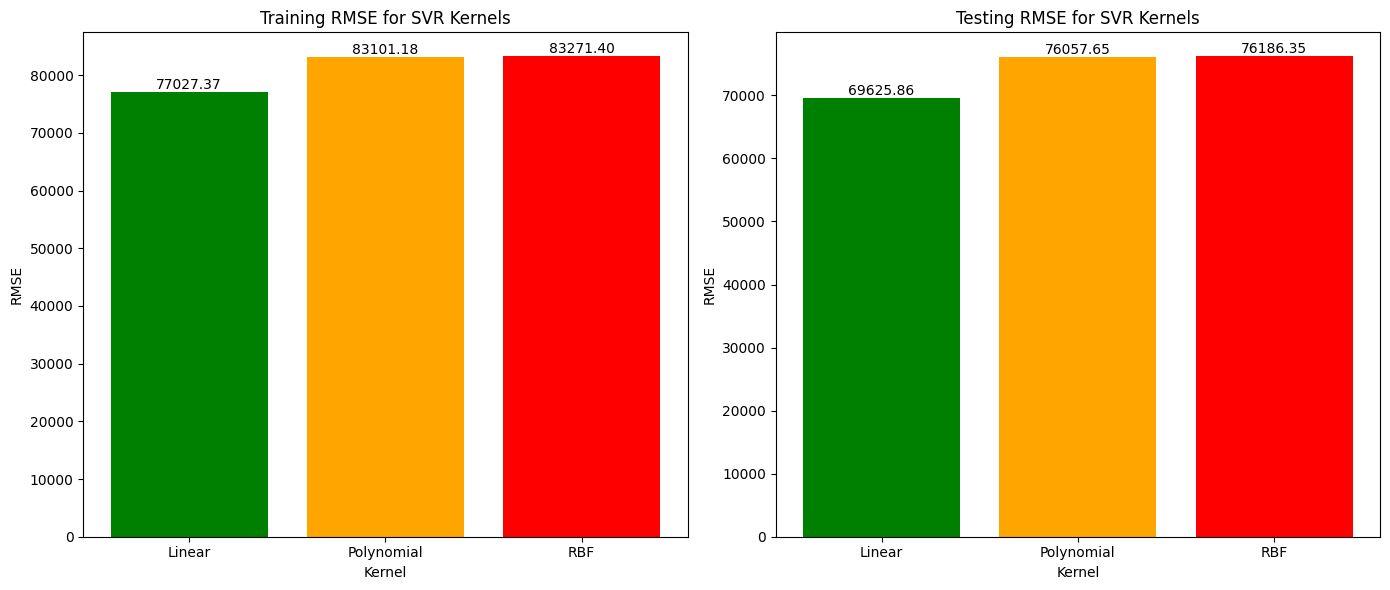

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the training dataset
df_train = pd.read_csv('train_refined_numeric.csv')

# Prepare features and target
X = df_train.drop(['SalePrice', 'SalePrice_pred'], axis=1)  # Features
y = df_train['SalePrice']  # Target

# Split the data into training and testing subsets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the features (SVR is sensitive to feature scales)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize SVR models with different kernels and max_iter parameter
svr_linear = SVR(kernel="linear", max_iter=1000)  # Limit to 1000 iterations
svr_poly = SVR(kernel="poly", degree=3, max_iter=1000)  # Polynomial kernel with degree 3 and iteration limit
svr_rbf = SVR(kernel="rbf", gamma=0.5, max_iter=1000)  # RBF kernel with gamma=0.5 and iteration limit

# Fit the SVR models
svr_linear.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)

# Predict on the train and test sets for each kernel
y_train_pred_linear = svr_linear.predict(X_train_scaled)
y_test_pred_linear = svr_linear.predict(X_test_scaled)

y_train_pred_poly = svr_poly.predict(X_train_scaled)
y_test_pred_poly = svr_poly.predict(X_test_scaled)

y_train_pred_rbf = svr_rbf.predict(X_train_scaled)
y_test_pred_rbf = svr_rbf.predict(X_test_scaled)

# Calculate RMSE for training and testing sets for each kernel
def calculate_errors(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    return rmse

train_rmse_linear = calculate_errors(y_train, y_train_pred_linear)
test_rmse_linear = calculate_errors(y_test, y_test_pred_linear)

train_rmse_poly = calculate_errors(y_train, y_train_pred_poly)
test_rmse_poly = calculate_errors(y_test, y_test_pred_poly)

train_rmse_rbf = calculate_errors(y_train, y_train_pred_rbf)
test_rmse_rbf = calculate_errors(y_test, y_test_pred_rbf)

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# RMSE values for training data
kernels = ['Linear', 'Polynomial', 'RBF']
train_rmse_values = [train_rmse_linear, train_rmse_poly, train_rmse_rbf]
bars_train = axes[0].bar(kernels, train_rmse_values, color=['green', 'orange', 'red'])

# Add labels to bars
for bar in bars_train:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[0].set_title("Training RMSE for SVR Kernels")
axes[0].set_xlabel("Kernel")
axes[0].set_ylabel("RMSE")

# RMSE values for testing data
test_rmse_values = [test_rmse_linear, test_rmse_poly, test_rmse_rbf]
bars_test = axes[1].bar(kernels, test_rmse_values, color=['green', 'orange', 'red'])

# Add labels to bars
for bar in bars_test:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[1].set_title("Testing RMSE for SVR Kernels")
axes[1].set_xlabel("Kernel")
axes[1].set_ylabel("RMSE")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Best parameters from RandomizedSearchCV: {'tol': 0.0001, 'max_iter': 5000, 'kernel': 'poly', 'gamma': 1, 'degree': 3, 'C': 10}
Best RMSE for training data from RandomizedSearchCV: 40026.48
Best RMSE for test data from RandomizedSearchCV: 28769.33


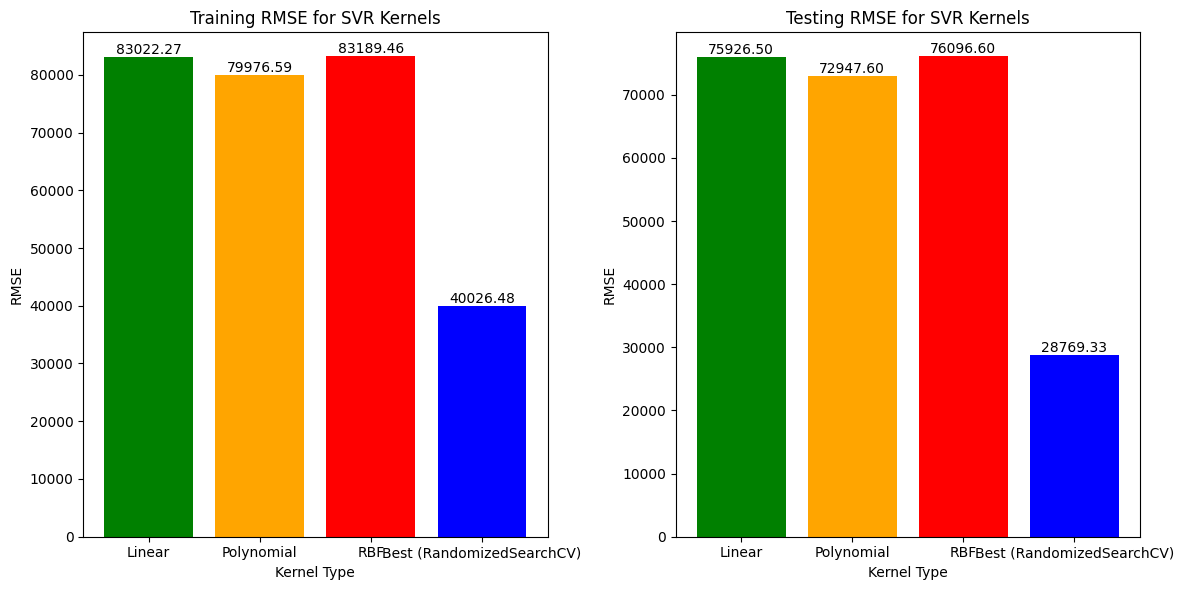

In [18]:
# Using Randomized search
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Load the training dataset
df_train = pd.read_csv('train_refined_numeric.csv')

# Prepare features and target
X = df_train.drop(['SalePrice', 'SalePrice_pred'], axis=1)  # Features
y = df_train['SalePrice']  # Target

# Split the data into training and testing subsets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the features using MinMaxScaler for better convergence
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Randomized Search
param_distributions = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'max_iter': [5000],
    'tol': [1e-4]
}

# Use 'neg_mean_squared_error' directly in RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=SVR(), param_distributions=param_distributions,
                                   n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_scaled, y_train)

# Extract best parameters and compute RMSE for training and testing
best_mse_train = -random_search.best_score_  # Convert negative MSE to positive (cross-validation)
best_rmse_train = np.sqrt(best_mse_train)  # Compute RMSE from best MSE
print("Best parameters from RandomizedSearchCV:", random_search.best_params_)
print(f"Best RMSE for training data from RandomizedSearchCV: {best_rmse_train:.2f}")

# Use the best model to predict on test data
best_model_random = random_search.best_estimator_
y_test_pred_random = best_model_random.predict(X_test_scaled)

# Calculate RMSE for the test set
best_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_random))
print(f"Best RMSE for test data from RandomizedSearchCV: {best_rmse_test:.2f}")

# Compare RMSE for manually selected SVR models
svr_linear = SVR(kernel="linear", max_iter=5000, tol=1e-4)
svr_poly = SVR(kernel="poly", degree=3, max_iter=5000, tol=1e-4)
svr_rbf = SVR(kernel="rbf", gamma=0.5, max_iter=5000, tol=1e-4)

# Fit the models
svr_linear.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_train_pred_linear = svr_linear.predict(X_train_scaled)
y_train_pred_poly = svr_poly.predict(X_train_scaled)
y_train_pred_rbf = svr_rbf.predict(X_train_scaled)

y_test_pred_linear = svr_linear.predict(X_test_scaled)
y_test_pred_poly = svr_poly.predict(X_test_scaled)
y_test_pred_rbf = svr_rbf.predict(X_test_scaled)

# Calculate RMSE for training and testing sets
train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
train_rmse_rbf = np.sqrt(mean_squared_error(y_train, y_train_pred_rbf))

test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
test_rmse_rbf = np.sqrt(mean_squared_error(y_test, y_test_pred_rbf))

# Create subplots with two columns (Training RMSE vs. Test RMSE)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# RMSE values for training data
train_rmse_values = [train_rmse_linear, train_rmse_poly, train_rmse_rbf, best_rmse_train]
bars_train = axes[0].bar(['Linear', 'Polynomial', 'RBF', 'Best (RandomizedSearchCV)'], train_rmse_values,
                         color=['green', 'orange', 'red', 'blue'])

# Add labels to bars
for bar in bars_train:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[0].set_title("Training RMSE for SVR Kernels")
axes[0].set_xlabel("Kernel Type")
axes[0].set_ylabel("RMSE")

# RMSE values for test data
test_rmse_values = [test_rmse_linear, test_rmse_poly, test_rmse_rbf, best_rmse_test]
bars_test = axes[1].bar(['Linear', 'Polynomial', 'RBF', 'Best (RandomizedSearchCV)'], test_rmse_values,
                        color=['green', 'orange', 'red', 'blue'])

# Add labels to bars
for bar in bars_test:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[1].set_title("Testing RMSE for SVR Kernels")
axes[1].set_xlabel("Kernel Type")
axes[1].set_ylabel("RMSE")

# Adjust layout and show plots
plt.tight_layout()
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters from GridSearchCV: {'C': 10, 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': 5000, 'tol': 0.0001}
Best RMSE for training data from GridSearchCV: 64113.75
Best RMSE for test data from GridSearchCV: 54521.60


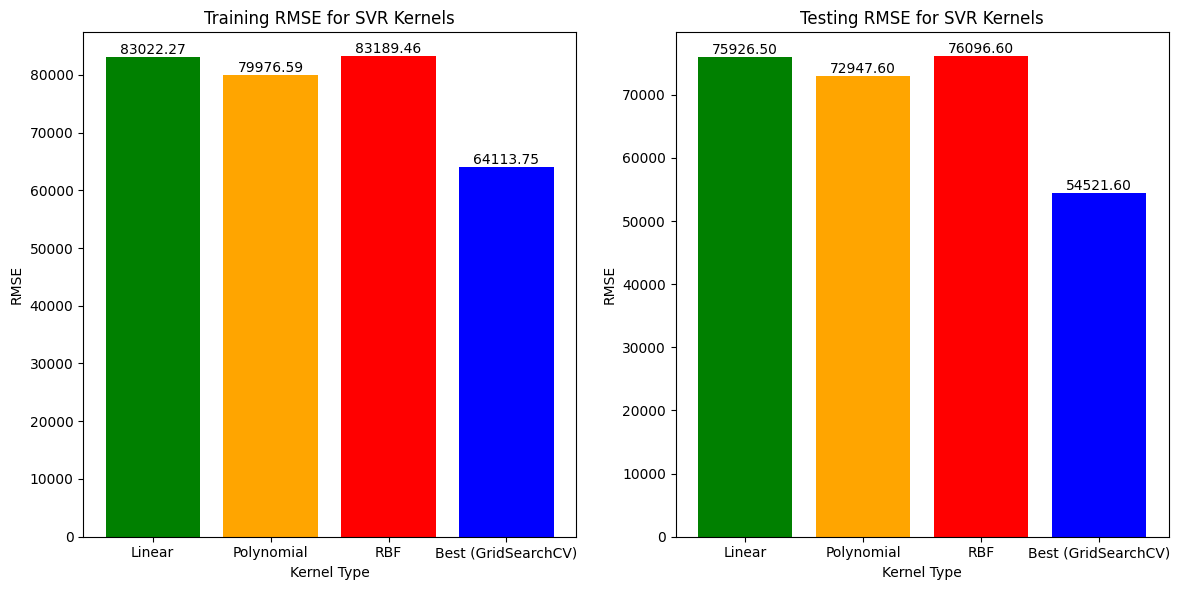

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV

# Load the training dataset
df_train = pd.read_csv('train_refined_numeric.csv')

# Prepare features and target
X = df_train.drop(['SalePrice', 'SalePrice_pred'], axis=1)  # Features
y = df_train['SalePrice']  # Target

# Split the data into training and testing subsets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Scale the features using MinMaxScaler for better convergence
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for Grid Search (More exhaustive than Random Search)
param_grid = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],  # Slightly reduced range for better efficiency
    'gamma': ['scale', 'auto', 0.01, 0.1],  # Focused selection
    'degree': [2, 3],  # Polynomial degree (for 'poly' kernel)
    'max_iter': [5000],
    'tol': [1e-4]
}

# Use 'neg_mean_squared_error' directly in GridSearchCV
grid_search = GridSearchCV(estimator=SVR(), param_grid=param_grid,
                           cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train_scaled, y_train)

# Extract best parameters and compute RMSE separately for training and testing data
best_mse_train = -grid_search.best_score_  # Convert negative MSE to positive (cross-validation training)
best_rmse_train = np.sqrt(best_mse_train)  # Compute RMSE from best MSE
print("Best parameters from GridSearchCV:", grid_search.best_params_)
print(f"Best RMSE for training data from GridSearchCV: {best_rmse_train:.2f}")

# Use the best model to predict on test data
best_model_grid = grid_search.best_estimator_
y_test_pred_grid = best_model_grid.predict(X_test_scaled)

# Calculate RMSE for the test set
best_rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred_grid))
print(f"Best RMSE for test data from GridSearchCV: {best_rmse_test:.2f}")

# Compare RMSE for manually selected SVR models
svr_linear = SVR(kernel="linear", max_iter=5000, tol=1e-4)
svr_poly = SVR(kernel="poly", degree=3, max_iter=5000, tol=1e-4)
svr_rbf = SVR(kernel="rbf", gamma=0.5, max_iter=5000, tol=1e-4)

# Fit the models
svr_linear.fit(X_train_scaled, y_train)
svr_poly.fit(X_train_scaled, y_train)
svr_rbf.fit(X_train_scaled, y_train)

# Predict on training and test sets
y_train_pred_linear = svr_linear.predict(X_train_scaled)
y_train_pred_poly = svr_poly.predict(X_train_scaled)
y_train_pred_rbf = svr_rbf.predict(X_train_scaled)

y_test_pred_linear = svr_linear.predict(X_test_scaled)
y_test_pred_poly = svr_poly.predict(X_test_scaled)
y_test_pred_rbf = svr_rbf.predict(X_test_scaled)

# Calculate RMSE for training and testing sets
train_rmse_linear = np.sqrt(mean_squared_error(y_train, y_train_pred_linear))
train_rmse_poly = np.sqrt(mean_squared_error(y_train, y_train_pred_poly))
train_rmse_rbf = np.sqrt(mean_squared_error(y_train, y_train_pred_rbf))

test_rmse_linear = np.sqrt(mean_squared_error(y_test, y_test_pred_linear))
test_rmse_poly = np.sqrt(mean_squared_error(y_test, y_test_pred_poly))
test_rmse_rbf = np.sqrt(mean_squared_error(y_test, y_test_pred_rbf))

# Create subplots with two columns (Training RMSE vs. Test RMSE)
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# RMSE values for training data
train_rmse_values = [train_rmse_linear, train_rmse_poly, train_rmse_rbf, best_rmse_train]
bars_train = axes[0].bar(['Linear', 'Polynomial', 'RBF', 'Best (GridSearchCV)'], train_rmse_values,
                         color=['green', 'orange', 'red', 'blue'])

# Add labels to bars
for bar in bars_train:
    yval = bar.get_height()
    axes[0].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[0].set_title("Training RMSE for SVR Kernels")
axes[0].set_xlabel("Kernel Type")
axes[0].set_ylabel("RMSE")

# RMSE values for test data
test_rmse_values = [test_rmse_linear, test_rmse_poly, test_rmse_rbf, best_rmse_test]
bars_test = axes[1].bar(['Linear', 'Polynomial', 'RBF', 'Best (GridSearchCV)'], test_rmse_values,
                        color=['green', 'orange', 'red', 'blue'])

# Add labels to bars
for bar in bars_test:
    yval = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')

axes[1].set_title("Testing RMSE for SVR Kernels")
axes[1].set_xlabel("Kernel Type")
axes[1].set_ylabel("RMSE")

# Adjust layout and show plots
plt.tight_layout()
plt.show()